# Play Ground

In [31]:
import warnings
import itertools
import os
import numpy as np
import matplotlib.pyplot as plt
#warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ml_metrics import rmse


In [32]:
from sklearn.datasets import load_boston
boston = load_boston()

In [33]:
#https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/
bostondf = pd.DataFrame(boston.data)
bostondf.columns = boston.feature_names
bostondf['MEDV'] = boston.target
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Baseline Model


In [35]:
# Create training and testing sets (cross-validation not needed)
train_set = bostondf.sample(frac=0.7, random_state=100)
test_set = bostondf[~bostondf.isin(train_set)].dropna()
print(train_set.shape[0])
print(test_set.shape[0])

354
152


In [36]:
# Get the training and testing row indices for later use
train_index = train_set.index.values.astype(int)
test_index = test_set.index.values.astype(int)

In [37]:
# Demonstration of using the row indices above to select consistent records
bostondf.iloc[train_index].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.6
229,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76,31.5
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,14.5
315,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50,16.2


In [38]:
# Converting the training and testing datasets back to matrix-formats
X_train = train_set.iloc[:, :-1].values # returns the data; excluding the target
Y_train = train_set.iloc[:, -1].values # returns the target-only
X_test = test_set.iloc[:, :-1].values # ""
Y_test = test_set.iloc[:, -1].values # ""

In [39]:
Y_train

array([34.6, 31.5, 20.6, 14.5, 16.2, 22.3, 22.8, 24.4, 19.8, 16.7, 23.2,
       15.1, 21. , 18.9, 48.5, 24.1, 22.5, 16.1, 30.3, 50. , 33.8, 10.4,
       20.4, 14.2, 10.5, 12.7, 24.5, 16.7, 20.1, 17.1, 18.4, 24.3, 50. ,
       23.8, 30.7, 33.4, 15. , 10.9, 19.1, 21. , 22.9, 22.4, 19. , 19.3,
       27. , 27.1, 19.1, 15.4, 19.1, 13.5, 20.9, 19.3, 20.5, 26.2, 12. ,
       19.7, 29.6, 34.9,  8.3, 21.2, 14.5, 27.5, 19.4, 32.7, 21.1, 28.1,
       17.4, 30.1, 21.4, 20.9, 10.9, 21.7,  8.8, 15.2, 26.6,  8.7, 24.7,
       38.7,  6.3, 22.6, 43.8, 50. , 14.5, 11.7, 12.5, 13.6, 21.5, 19.1,
        9.5, 17.2, 29.8, 22.6, 21.6, 22.2, 27.1, 17. , 22. , 50. ,  7.2,
       50. , 14. , 11. , 10.2, 22.1, 41.3, 17.6, 24.7,  8.5,  8.1, 26.4,
       23. , 35.1, 35.4, 12.8, 24. , 20.2, 29.4, 16. , 50. ,  8.5, 14.9,
       13.8, 21.8, 23.1, 20.1, 13.4, 15.3, 20. , 20. , 19.7, 22.8, 18.2,
       23.3, 18.4, 23. , 50. , 23.1, 23.3, 21.4, 21.4, 13.1,  7. , 14.3,
       31.2, 30.5, 19.6, 50. , 24.4, 18.8, 29.9, 12

In [40]:
# Fit a linear regression to the training data
reg = LinearRegression(normalize=True).fit(X_train, Y_train)
print(reg.score(X_train, Y_train))
print(reg.coef_)
print(reg.intercept_)
print(reg.get_params())

0.7478284701218886
[-1.35456753e-01  5.48606010e-02  5.46611167e-02  3.57648807e+00
 -2.01163242e+01  3.96567027e+00  1.33685712e-02 -1.48716658e+00
  2.99295349e-01 -9.83868843e-03 -9.45023886e-01  6.45207267e-03
 -5.77572297e-01]
36.079347688282304
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


In [41]:
# Show Coef of the variables 
for x,y in zip(bostondf.columns, reg.coef_):
    print(x," : ",y)

CRIM  :  -0.13545675283333689
ZN  :  0.05486060103359965
INDUS  :  0.05466111666902427
CHAS  :  3.576488065984514
NOX  :  -20.11632424763777
RM  :  3.9656702708586273
AGE  :  0.013368571236074277
DIS  :  -1.4871665788179078
RAD  :  0.29929534944621167
TAX  :  -0.009838688425542912
PTRATIO  :  -0.9450238858515401
B  :  0.0064520726706565655
LSTAT  :  -0.5775722969727087


In [42]:
# Find the variable with the largest "normalized" coefficient value
# print('The abs(max) coef-value is {}'.format(max(reg.coef_))) # Positive Max
print('The abs(max) coef-value is {}'.format(max(reg.coef_, key=abs))) # ABS Max
#max_var = max(reg.coef_) # Positive Max
max_var = max(reg.coef_, key=abs) # ABS Max
var_index = reg.coef_.tolist().index(max_var)
print('The variable associated with this coef-value is {}'.format(boston.feature_names[var_index]))

The abs(max) coef-value is -20.11632424763777
The variable associated with this coef-value is NOX


In [43]:
Y_pred = reg.predict(X_test)

orig_mae = mean_absolute_error(Y_test,Y_pred)
orig_mse = mean_squared_error(Y_test,Y_pred)
orig_rmse_val = rmse(Y_test,Y_pred)
orig_r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%orig_mae)
print("MSE:  %.3f"%orig_mse)
print("RMSE:  %.3f"%orig_rmse_val)
print("R2:  %.3f"%orig_r2)

MAE: 3.605
MSE:  24.099
RMSE:  4.909
R2:  0.705


In [44]:
res_frame = pd.DataFrame({'Imputation %':0,
                   'imputation':'none',
                   'mae': orig_mae, 
                   'mse': orig_mse, 
                   'rmse':orig_rmse_val, 
                   'R2':orig_r2,
                   'mae_diff':np.nan,
                   'mse_diff':np.nan,
                   'rmse_diff':np.nan,
                   'R2_diff':np.nan}, index=[0])
res_frame

,Imputation %,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,0,none,3.604571,24.098505,4.909023,0.70494,NaN,NaN,NaN,NaN


### Imputation Analysis: Round 1 - Missing at Random

In [45]:
def imputation_defintion(frac):
    # Here we randomly sample the full dataset and replace a single column's values  
    in_sample = bostondf.sample(frac=frac, random_state=99)
    in_sample.shape
    out_sample = bostondf[~bostondf.isin(in_sample)].dropna()
    out_sample.shape

    print(out_sample.shape[0] + in_sample.shape[0])
    print(bostondf.shape[0])

    in_sample.head()

    ## Choose a variable to replace   
    in_sample['NOX'] = np.nan
    in_sample.head()

    out_sample['NOX'].mean()
   
 
    #**Choose an imputation method**   
    in_sample['NOX'] = in_sample['NOX'].fillna(out_sample['NOX'].mean())
    in_sample.head()
    
    imputed_data = pd.concat([in_sample, out_sample])
    imputed_data = imputed_data.sort_index()
    imputed_data.head()

    #**Use the same training and testing indices to fit the model**    
    train_set = imputed_data.iloc[train_index]
    test_set = imputed_data.iloc[test_index]
    train_set.head()
    
    X_train = train_set.iloc[:, :-1].values
    Y_train = train_set.iloc[:, -1].values
    X_test = test_set.iloc[:, :-1].values
    Y_test = test_set.iloc[:, -1].values

    #**Fit a new model to the imputed dataset**
    reg2 = LinearRegression().fit(X_train, Y_train)
    print(reg2.score(X_train, Y_train))
    print(reg2.coef_)
    print(reg2.intercept_)
    print(reg2.get_params())

    Y_pred = reg2.predict(X_test)

    mae = mean_absolute_error(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    rmse_val = rmse(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)
    print("MAE: %.3f"%mae)
    print("MSE:  %.3f"%mse)
    print("RMSE:  %.3f"%rmse_val)
    print("R2:  %.3f"%r2)
    plt.figure(figsize = (16,8))
    plt.title(frac)
    plt.suptitle("Actual Prices vs Predicted prices")
    sns.distplot((Y_test-Y_pred),bins=50);
    
    temp_frame = pd.DataFrame({'Imputation %':frac,
                   'imputation':'MAR',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])
    return temp_frame

#### Subsequent rounds of imputation

506
506
0.7471872675088559
[-1.35060367e-01  5.52880111e-02  4.92106883e-02  3.57387380e+00
 -1.93630061e+01  3.98024223e+00  1.12286846e-02 -1.49013134e+00
  2.96788129e-01 -9.81222019e-03 -9.36232675e-01  6.48346804e-03
 -5.78681214e-01]
35.65741195166541
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.615
MSE:  24.083
RMSE:  4.907
R2:  0.705
506
506
0.7473915197572394
[-1.32222544e-01  5.40778218e-02  4.40813049e-02  3.40249852e+00
 -1.88263679e+01  4.06019497e+00  1.02752100e-02 -1.46966536e+00
  2.89358187e-01 -9.97944171e-03 -9.17889940e-01  5.85535134e-03
 -5.83552242e-01]
34.97443864048253
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.661
MSE:  24.582
RMSE:  4.958
R2:  0.699
506
506
0.7435800470103526
[-1.28024473e-01  5.51149616e-02  2.73288209e-02  3.54003346e+00
 -1.56681175e+01  4.08223815e+00  7.19918515e-03 -1.42398819e+00
  2.74139691e-01 -9.99597034e-03 -8.71051315e-01  6.42825682e-03
 -5.86965438e-

,Imputation %,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,0.00,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,0.01,MAR,3.615359,24.082785,4.907421,0.705132,0.010787,-0.015720,-0.001601,0.000192
0,0.05,MAR,3.660596,24.582077,4.958032,0.699019,0.056025,0.483572,0.049009,-0.005921
0,0.10,MAR,3.656422,24.903580,4.990349,0.695083,0.051851,0.805075,0.081326,-0.009857
0,0.20,MAR,3.557830,24.044459,4.903515,0.705602,-0.046741,-0.054046,-0.005508,0.000662
0,0.33,MAR,3.564872,24.066527,4.905765,0.705331,-0.039699,-0.031978,-0.003258,0.000392
0,0.50,MAR,3.621070,24.475961,4.947319,0.700318,0.016499,0.377456,0.038296,-0.004622


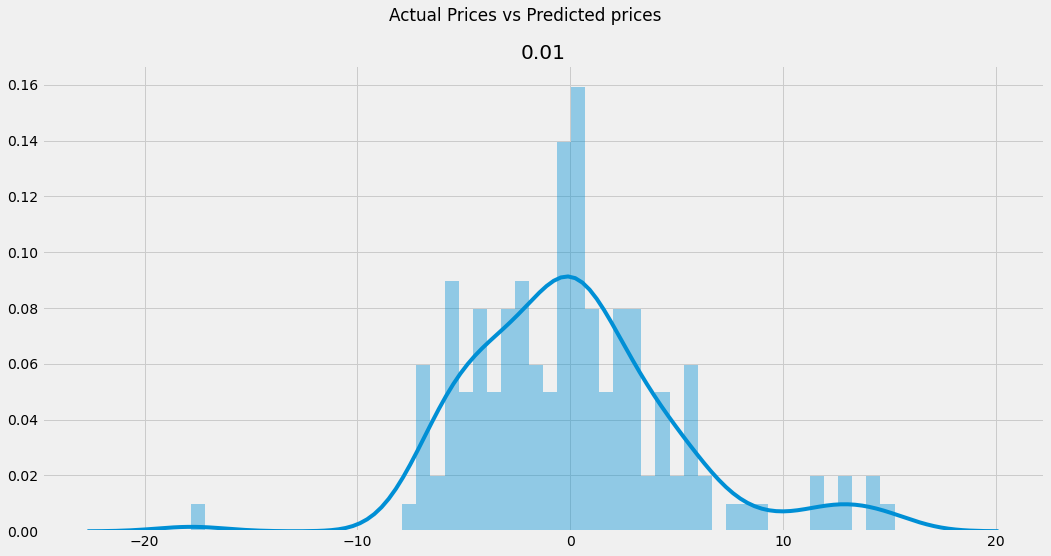

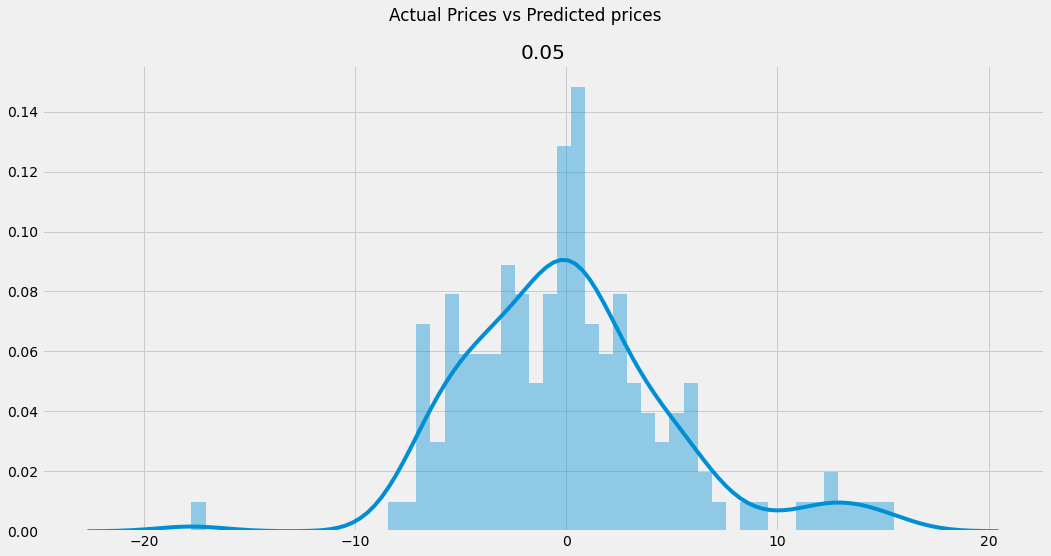

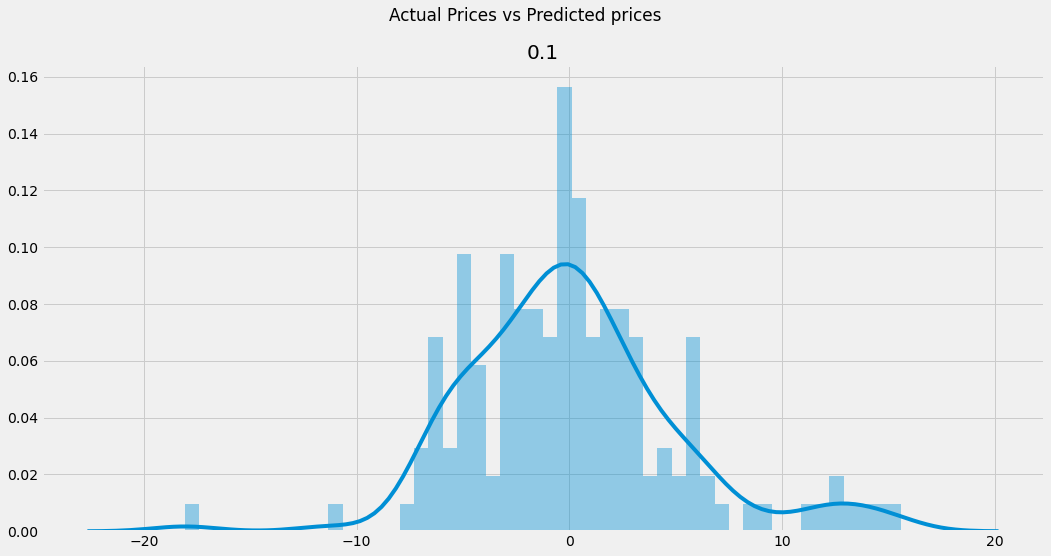

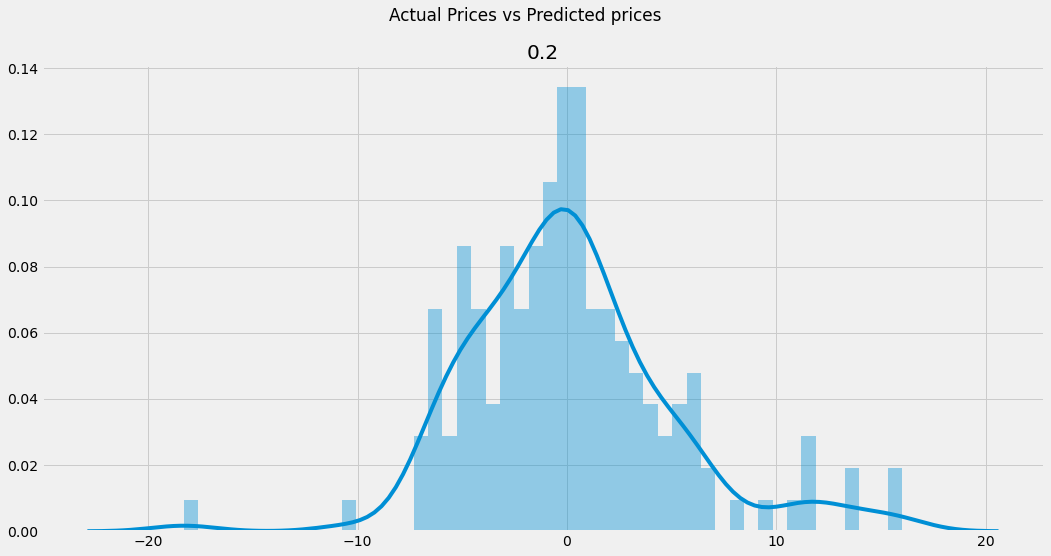

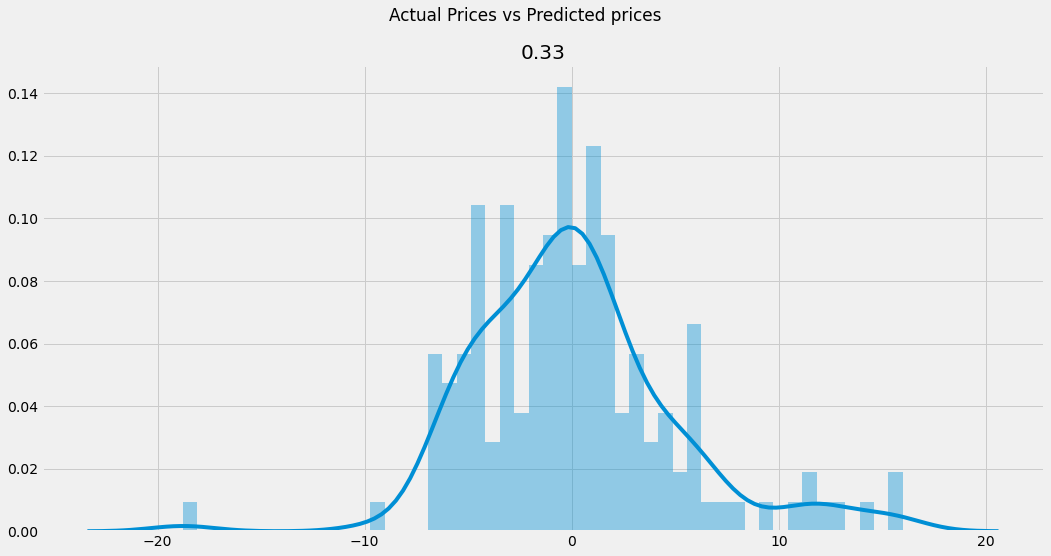

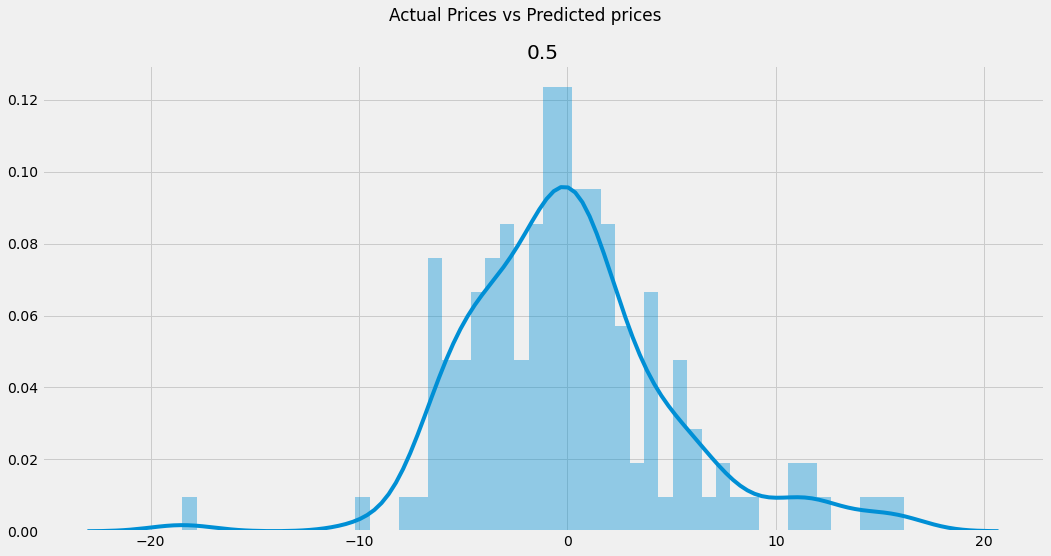

In [46]:
#1%, 5% 10%, 20%, 33%, and 50% 
temp_frame = imputation_defintion(.01)
#temp_frame
res_frame = pd.concat([res_frame, temp_frame])

temp_frame = imputation_defintion(.05)
#temp_frame
res_frame = pd.concat([res_frame, temp_frame])

temp_frame = imputation_defintion(.1)
#temp_frame
res_frame = pd.concat([res_frame, temp_frame])

temp_frame = imputation_defintion(.2)
#temp_frame
res_frame = pd.concat([res_frame, temp_frame])

temp_frame = imputation_defintion(.33)
#temp_frame
res_frame = pd.concat([res_frame, temp_frame])

temp_frame = imputation_defintion(.5)
#temp_frame
res_frame = pd.concat([res_frame, temp_frame])

res_frame

### Imputation Analysis: Round 2 - Missing at Random (version 2)


Step 3: Take two columns and create data “Missing at Random” when controlled for a third variable (i.e., if Variable Z is > 30, then Variables X, Y are randomly missing).  Use your preferred imputation method to fill in 10%, 20% and 30% of your missing data.

Question 3: In each case [10%, 20%, 30%] perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.  [Note: you should have (9) models to compare against your baseline at this point.]


In [47]:
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


This is also done in the python function, but to build the missing data we used AGE. AGE of greater than 77.5 will cause the function to build random missing data for variables RM and INDUS. Those are then imputed with MEAN.

In [48]:
bostondfa = bostondf[bostondf['AGE'] > 77.5]
bostondfb = bostondf[bostondf['AGE'] <= 77.5]
bostondfa.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0


In [49]:
def imputation_defintion_two_variables(frac):
    
#get two dataframes one with age over 77.5 one with less.
    bostondfa = bostondf[bostondf['AGE'] > 77.5]
    bostondfb = bostondf[bostondf['AGE'] <= 77.5]

#**Here we can randomly sample the over 77.5 dataset and replace a single column's values**  
    in_sample = bostondfa.sample(frac=frac, random_state=99)
    in_sample.shape
    out_sample = bostondfa[~bostondfa.isin(in_sample)].dropna()
    out_sample.shape

    print(out_sample.shape[0] + in_sample.shape[0])
    print(bostondf.shape[0])

    in_sample.head()

 ## Choose variables to replace   
    
    in_sample['RM'] = np.nan
    in_sample['INDUS'] = np.nan
    in_sample.head()

    out_sample['RM'].mean()
    out_sample['INDUS'].mean()

    #Choose an imputation method**   
    in_sample['RM'] = in_sample['RM'].fillna(out_sample['RM'].mean())
    in_sample['INDUS'] = in_sample['INDUS'].fillna(out_sample['INDUS'].mean())
    in_sample.head()
    
#**Rejoin the imputed and original datasets**
    frames = [in_sample, out_sample, bostondfb]
    imputed_data = pd.concat(frames)
    imputed_data = imputed_data.sort_index()
    imputed_data.head()

#**Use the same training and testing indices to fit the model**    
    train_set = imputed_data.iloc[train_index]
    test_set = imputed_data.iloc[test_index]
    train_set.head()
    
    X_train = train_set.iloc[:, :-1].values
    Y_train = train_set.iloc[:, -1].values
    X_test = test_set.iloc[:, :-1].values
    Y_test = test_set.iloc[:, -1].values

#**Fit a new model to the imputed dataset**
    reg2 = LinearRegression().fit(X_train, Y_train)
    print(reg2.score(X_train, Y_train))
    print(reg2.coef_)
    print(reg2.intercept_)
    print(reg2.get_params())

    Y_pred = reg2.predict(X_test)

    mae = mean_absolute_error(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    rmse_val = rmse(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)
    print("MAE: %.3f"%mae)
    print("MSE:  %.3f"%mse)
    print("RMSE:  %.3f"%rmse_val)
    print("R2:  %.3f"%r2)
    plt.figure(figsize = (16,8))
    plt.title(frac)
    plt.suptitle("Actual Prices vs Predicted prices")
    sns.distplot((Y_test-Y_pred),bins=50);
    
    temp_frame = pd.DataFrame({'Imputation %':frac,
                   'imputation':'MAR2V',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])
    return temp_frame

253
506
0.7507448331169366
[-1.32581477e-01  5.20634426e-02  1.32848271e-02  3.51587576e+00
 -1.89858816e+01  4.06640410e+00  1.54273571e-02 -1.50371105e+00
  2.88528643e-01 -9.21063791e-03 -9.52682617e-01  6.34416918e-03
 -5.83470076e-01]
35.34489988780497
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.577
MSE:  23.915
RMSE:  4.890
R2:  0.707


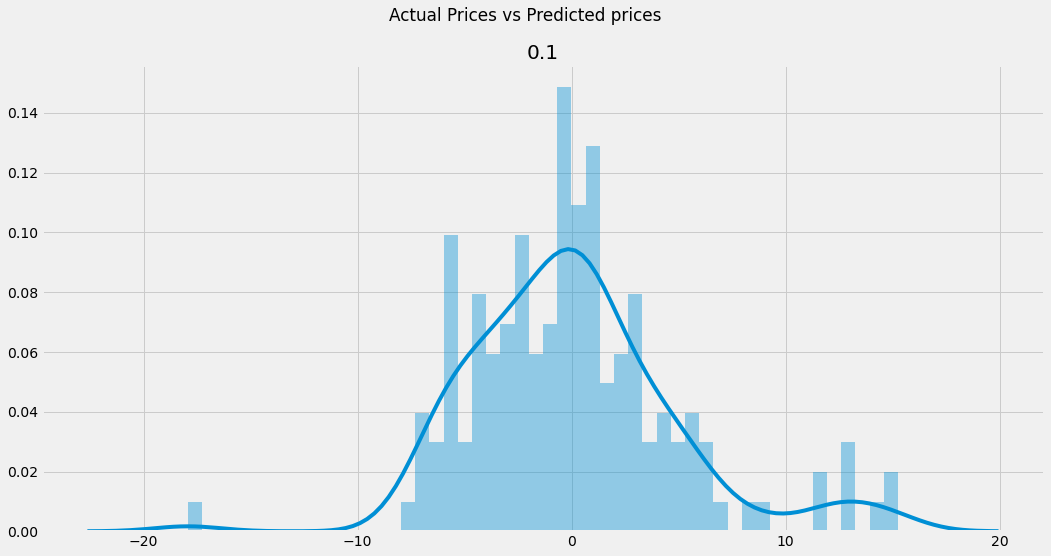

In [50]:
#10%, 20%, 30%
temp_frame2 = imputation_defintion_two_variables(.1)
temp_frame2
res_frame2 =temp_frame2
#res_frame2

253
506
0.7455810209314883
[-1.32984459e-01  5.24710043e-02 -1.57428560e-02  3.62239528e+00
 -1.95101078e+01  3.79219020e+00  1.85360425e-02 -1.54977935e+00
  2.93134087e-01 -8.85329992e-03 -9.49314278e-01  5.96393497e-03
 -6.09950257e-01]
37.82022209516384
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.546
MSE:  23.572
RMSE:  4.855
R2:  0.711
253
506
0.7394504745225753
[-1.34260998e-01  5.42508552e-02  1.33241857e-02  3.88622432e+00
 -1.98699757e+01  3.60487109e+00  2.14862722e-02 -1.54631509e+00
  3.13564211e-01 -9.87298329e-03 -9.86096746e-01  5.73448107e-03
 -6.41688381e-01]
40.04757008369952
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.544
MSE:  22.764
RMSE:  4.771
R2:  0.721


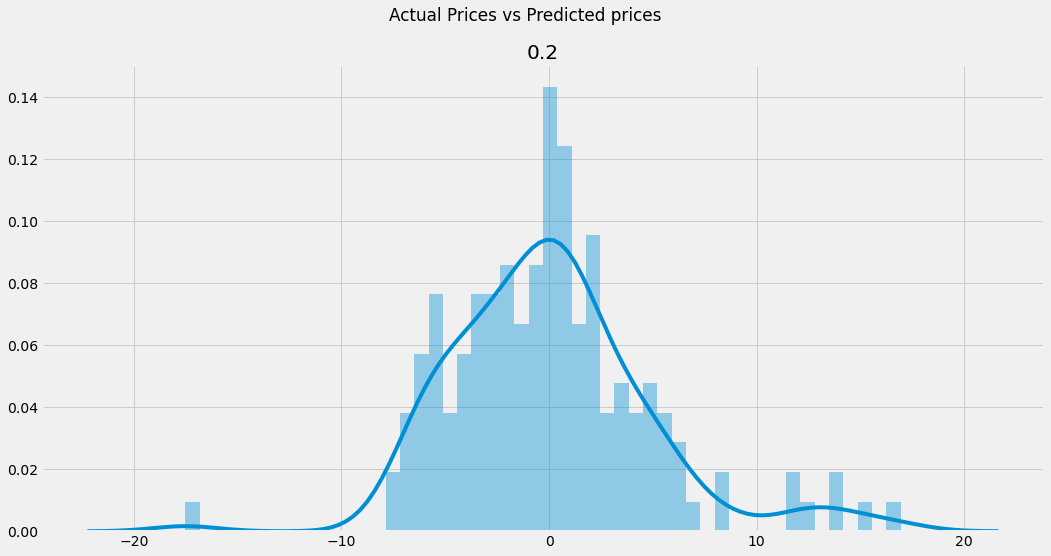

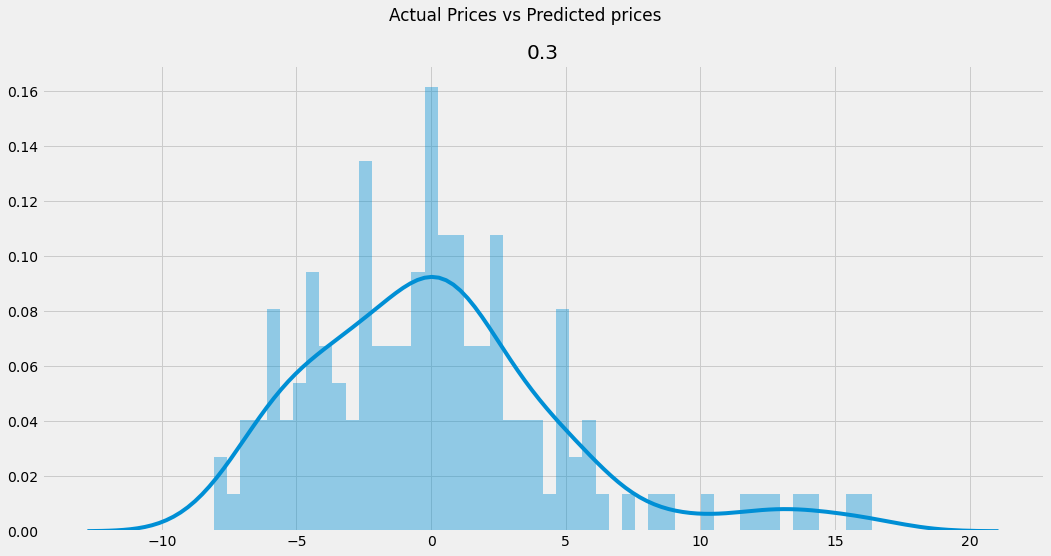

In [51]:
temp_frame2 = imputation_defintion_two_variables(.2)
temp_frame2
res_frame2 = pd.concat([res_frame2, temp_frame2])

temp_frame2 = imputation_defintion_two_variables(.3)
temp_frame2
res_frame2 = pd.concat([res_frame2, temp_frame2])

In [52]:
res_frame2
res_frame = pd.concat([res_frame, res_frame2])

In [53]:
res_frame

,Imputation %,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,0.00,none,3.604571,24.098505,4.909023,0.704940,NaN,NaN,NaN,NaN
0,0.01,MAR,3.615359,24.082785,4.907421,0.705132,0.010787,-0.015720,-0.001601,0.000192
0,0.05,MAR,3.660596,24.582077,4.958032,0.699019,0.056025,0.483572,0.049009,-0.005921
0,0.10,MAR,3.656422,24.903580,4.990349,0.695083,0.051851,0.805075,0.081326,-0.009857
0,0.20,MAR,3.557830,24.044459,4.903515,0.705602,-0.046741,-0.054046,-0.005508,0.000662
0,0.33,MAR,3.564872,24.066527,4.905765,0.705331,-0.039699,-0.031978,-0.003258,0.000392
0,0.50,MAR,3.621070,24.475961,4.947319,0.700318,0.016499,0.377456,0.038296,-0.004622
0,0.10,MAR2V,3.577473,23.914883,4.890285,0.707188,-0.027098,-0.183622,-0.018738,0.002248
0,0.20,MAR2V,3.546022,23.572458,4.855148,0.711381,-0.058549,-0.526047,-0.053875,0.006441
0,0.30,MAR2V,3.544113,22.764455,4.771211,0.721274,-0.060458,-1.334049,-0.137812,0.016334


### Imputation Analysis: Round 3 - Missing Not at Random


Step 4:  Create a “Missing Not at Random” pattern in which 25% of the data is missing for a single column.

Question 4: Perform a fit with the imputed data [25%] and compare the loss and goodness of fit to your baseline.  [Note: you should have (10) models to compare against your baseline at this point.]

**Missing Not at Random (MNAR)** probability of missing values, not at random, depends on information that has not been recorded, and this information predicts the missing values, almost impossible to handle - shouldn't be any effect of MNAR on inferences made by a model trained on such data.


In [54]:
def imputation_defintion_nar(frac):
#**Here we can randomly sample the full dataset and replace a single column's values**  
    numrows = len(bostondf)
    numrows
    twentyfivepercent = round(numrows * frac)
    twentyfivepercent
    in_sample = bostondfb.iloc[twentyfivepercent:]
    in_sample.shape
    out_sample = bostondf[~bostondf.isin(in_sample)].dropna()
    out_sample.shape

    print(out_sample.shape[0] + in_sample.shape[0])
    print(bostondf.shape[0])

    in_sample.head()

 ## Choose a variable to replace   
    in_sample['NOX'] = np.nan
    #in_sample['RM'] = np.nan
    in_sample.head()

    out_sample['NOX'].mean()
    
    #**Choose an imputation method**   
    
    in_sample['NOX'] = in_sample['NOX'].fillna(out_sample['NOX'].mean())
    in_sample.head()
    
#**Rejoin the imputed and original datasets**
    imputed_data = pd.concat([in_sample, out_sample])
    imputed_data = imputed_data.sort_index()
    imputed_data.head()

#**Use the same training and testing indices to fit the model**    
    train_set = imputed_data.iloc[train_index]
    test_set = imputed_data.iloc[test_index]
    train_set.head()
    
    X_train = train_set.iloc[:, :-1].values
    Y_train = train_set.iloc[:, -1].values
    X_test = test_set.iloc[:, :-1].values
    Y_test = test_set.iloc[:, -1].values

#**Fit a new model to the imputed dataset**
    reg2 = LinearRegression().fit(X_train, Y_train)
    print(reg2.score(X_train, Y_train))
    print(reg2.coef_)
    print(reg2.intercept_)
    print(reg2.get_params())

    Y_pred = reg2.predict(X_test)

    mae = mean_absolute_error(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    rmse_val = rmse(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)
    print("MAE: %.3f"%mae)
    print("MSE:  %.3f"%mse)
    print("RMSE:  %.3f"%rmse_val)
    print("R2:  %.3f"%r2)

    plt.figure(figsize = (16,8))
    plt.title(frac)
    plt.suptitle("Actual Prices vs Predicted prices")
    sns.distplot((Y_test-Y_pred),bins=50);
    
    temp_frame = pd.DataFrame({'Imputation %':frac,
                   'imputation':'NAR',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])
    return temp_frame

In [55]:
numrows = len(bostondf)
numrows
twentyfivepercent = round(numrows * .25)
twentyfivepercent

126

506
506
0.7458322299870972
[-1.27159127e-01  5.55101448e-02  4.85914271e-02  3.64604788e+00
 -1.52343007e+01  3.93850375e+00  5.21881550e-03 -1.18368714e+00
  2.91107848e-01 -1.01264519e-02 -9.14127520e-01  6.89035096e-03
 -5.89687738e-01]
32.93016809142427
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
MAE: 3.536
MSE:  23.929
RMSE:  4.892
R2:  0.707


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Imputation %,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,0.25,NAR,3.536339,23.928729,4.8917,0.707019,-0.068232,-0.169776,-0.017323,0.002079


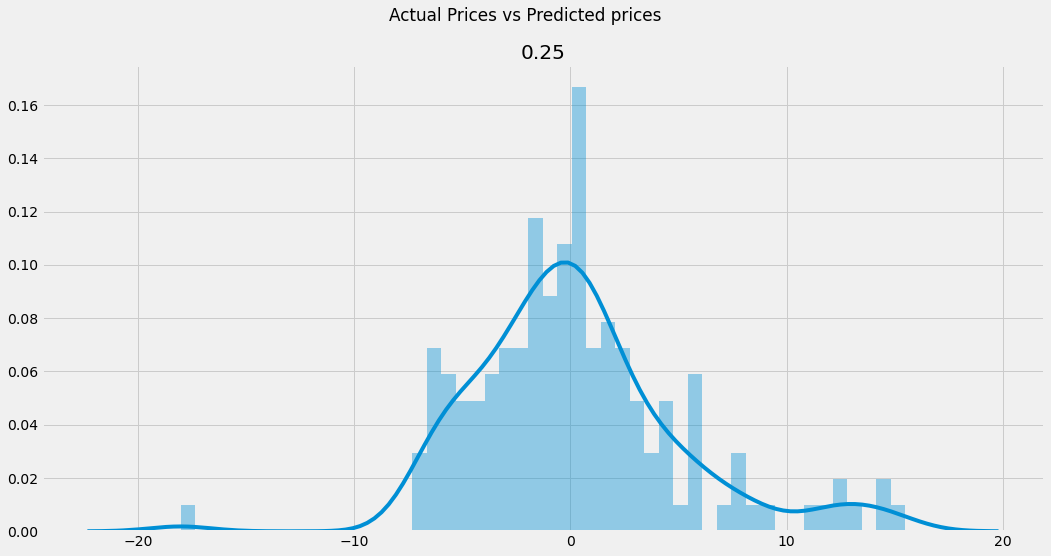

In [56]:
temp_frame3 = imputation_defintion_nar(.25)
temp_frame3

## Conclusion

In [57]:
res_frame = pd.concat([res_frame, temp_frame3])
res_frame.to_csv('CombinedMetrics_Mean.csv')
res_frame 

PermissionError: [Errno 13] Permission denied: 'CombinedMetrics_Mean.csv'

“Working with Missing Data”

Step 1:
Use sklearn.datasets to get the Boston Housing dataset.
Fit a linear regressor to the data as a baseline.  There is no need to do Cross-Validation.  We will simply be exploring the change in results.

Question 1: What is the loss and what are the goodness of fit parameters?  This will be our baseline for comparison.

Step 2: (repeat for each percentage value below)
Select 1%, 5% 10%, 20%, 33%, and 50% of your data in a single column [hold that column selection constant throughout all iterations] (Completely at random), replace the original value with a NaN (i.e., “not a number” – ex., np.nan) and then perform an imputation for the missing values.   

Question 2: In each case [1%, 5%, 10%, 20%, 33%, 50%] perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.  [Note: you should have (6) models to compare against your baseline at this point.]

Step 3: Take two columns and create data “Missing at Random” when controlled for a third variable (i.e., if Variable Z is > 30, then Variables X, Y are randomly missing).  Use your preferred imputation method to fill in 10%, 20% and 30% of your missing data.

Question 3: In each case [10%, 20%, 30%] perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.  [Note: you should have (9) models to compare against your baseline at this point.]


Step 4:  Create a “Missing Not at Random” pattern in which 25% of the data is missing for a single column.

Question 4: Perform a fit with the imputed data [25%] and compare the loss and goodness of fit to your baseline.  [Note: you should have (10) models to compare against your baseline at this point.]

Step 5: Describe your imputation approach and summarize your findings.  What impact did the missing data have on your baseline model’s performance? 
